#### Unit 2: Lesson 1: Preparing Data for Modelling

Kaggle competion; Predicting the price of a home

Data source; https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/all.zip?

Thinkful Drill; Unit 2, Lesson 1

Saheed 16 Dec 2018

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import math
from scipy import stats
from scipy.stats import norm, kstest
from matplotlib.mlab import PCA as mlabPCA
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

#plt.rcParams['figure.figsize'] = (50.0, 20.0)
#plt.rcParams.update({'font.size': 22})

In [129]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.1.


In [130]:
#only training data

df_raw = pd.read_csv('train_kaggle_homesale.csv')

In [131]:
df_raw.columns
print('number of columns in raw data is: {}'.format(len(df_raw.columns)))

number of columns in raw data is: 81


In [132]:
#extract relevant columns for this drill
df_raw_trimmed = df_raw[['Id', 'LotArea', 'Street', 'Alley', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
                         'YearBuilt', 'CentralAir', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                         'TotRmsAbvGrd', 'GarageType', 'GarageCars', 'GarageArea', 'PavedDrive', 'PoolArea', 'MoSold',
                         'YrSold', 'SaleCondition', 'SalePrice']]
df_raw_trimmed.head()

,Id,LotArea,Street,Alley,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,CentralAir,...,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,PavedDrive,PoolArea,MoSold,YrSold,SaleCondition,SalePrice
0,1,8450,Pave,NaN,1Fam,2Story,7,5,2003,Y,...,8,Attchd,2,548,Y,0,2,2008,Normal,208500
1,2,9600,Pave,NaN,1Fam,1Story,6,8,1976,Y,...,6,Attchd,2,460,Y,0,5,2007,Normal,181500
2,3,11250,Pave,NaN,1Fam,2Story,7,5,2001,Y,...,6,Attchd,2,608,Y,0,9,2008,Normal,223500
3,4,9550,Pave,NaN,1Fam,2Story,7,5,1915,Y,...,7,Detchd,3,642,Y,0,2,2006,Abnorml,140000
4,5,14260,Pave,NaN,1Fam,2Story,8,5,2000,Y,...,9,Attchd,3,836,Y,0,12,2008,Normal,250000


In [133]:
#get data shape or dimension
df_raw_trimmed.shape

(1460, 25)

In [134]:
#find details of missing data
df_raw_trimmed.isnull().sum()

Id                  0
LotArea             0
Street              0
Alley            1369
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
CentralAir          0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
GarageType         81
GarageCars          0
GarageArea          0
PavedDrive          0
PoolArea            0
MoSold              0
YrSold              0
SaleCondition       0
SalePrice           0
dtype: int64

In [135]:
#a large number of data is missing in the Alley column, the col will thereby be dropped
df_raw_trimmed.drop('Alley', axis=1, inplace=True )

In [136]:
#use dropna to remove the nan 81 nan in GarageType
df_raw_trimmed.dropna().head()

,Id,LotArea,Street,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,CentralAir,GrLivArea,...,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,PavedDrive,PoolArea,MoSold,YrSold,SaleCondition,SalePrice
0,1,8450,Pave,1Fam,2Story,7,5,2003,Y,1710,...,8,Attchd,2,548,Y,0,2,2008,Normal,208500
1,2,9600,Pave,1Fam,1Story,6,8,1976,Y,1262,...,6,Attchd,2,460,Y,0,5,2007,Normal,181500
2,3,11250,Pave,1Fam,2Story,7,5,2001,Y,1786,...,6,Attchd,2,608,Y,0,9,2008,Normal,223500
3,4,9550,Pave,1Fam,2Story,7,5,1915,Y,1717,...,7,Detchd,3,642,Y,0,2,2006,Abnorml,140000
4,5,14260,Pave,1Fam,2Story,8,5,2000,Y,2198,...,9,Attchd,3,836,Y,0,12,2008,Normal,250000


In [137]:
df_raw_trimmed.shape

(1460, 24)

In [138]:
#get the data description
df_raw_trimmed.describe()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,6.099315,5.575342,1971.267808,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,472.980137,2.758904,6.321918,2007.815753,180921.195890
std,421.610009,9981.264932,1.382997,1.112799,30.202904,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,213.804841,40.177307,2.703626,1.328095,79442.502883
min,1.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,7553.500000,5.000000,5.000000,1954.000000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,334.500000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,9478.500000,6.000000,5.000000,1973.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,480.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,11601.500000,7.000000,6.000000,2000.000000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,215245.000000,10.000000,9.000000,2010.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,738.000000,12.000000,2010.000000,755000.000000


In [139]:
#extract continous variables from data for further anaylysis (Id, month sold and year built/sold are not included)
df_raw_trimmed_cont = df_raw_trimmed[['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'FullBath', 'HalfBath', 
                                          'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 
                                          'PoolArea', 'SalePrice']]
df_raw_trimmed_cont.describe()


,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,472.980137,2.758904,180921.195890
std,9981.264932,1.382997,1.112799,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,213.804841,40.177307,79442.502883
min,1300.000000,1.000000,1.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,5.000000,5.000000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,334.500000,0.000000,129975.000000
50%,9478.500000,6.000000,5.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,480.000000,0.000000,163000.000000
75%,11601.500000,7.000000,6.000000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,0.000000,214000.000000
max,215245.000000,10.000000,9.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,738.000000,755000.000000


In [140]:
#re-scale data to 0-1, plot histogram using Facetgrid and look out for outliers
for col in df_raw_trimmed_cont:
    df_raw_trimmed_cont[col] = df_raw_trimmed_cont[col]/max(df_raw_trimmed_cont[col])
    
df_raw_trimmed_cont_scaled =  df_raw_trimmed_cont
df_raw_trimmed_cont_scaled.head()   


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,SalePrice
0,0.039258,0.7,0.555556,0.303084,0.666667,0.5,0.375,0.333333,0.571429,0.50,0.386460,0.0,0.276159
1,0.044600,0.6,0.888889,0.223680,0.666667,0.0,0.375,0.333333,0.428571,0.50,0.324401,0.0,0.240397
2,0.052266,0.7,0.555556,0.316554,0.666667,0.5,0.375,0.333333,0.428571,0.50,0.428773,0.0,0.296026
3,0.044368,0.7,0.555556,0.304325,0.333333,0.0,0.375,0.333333,0.500000,0.75,0.452750,0.0,0.185430
4,0.066250,0.8,0.555556,0.389578,0.666667,0.5,0.500,0.333333,0.642857,0.75,0.589563,0.0,0.331126


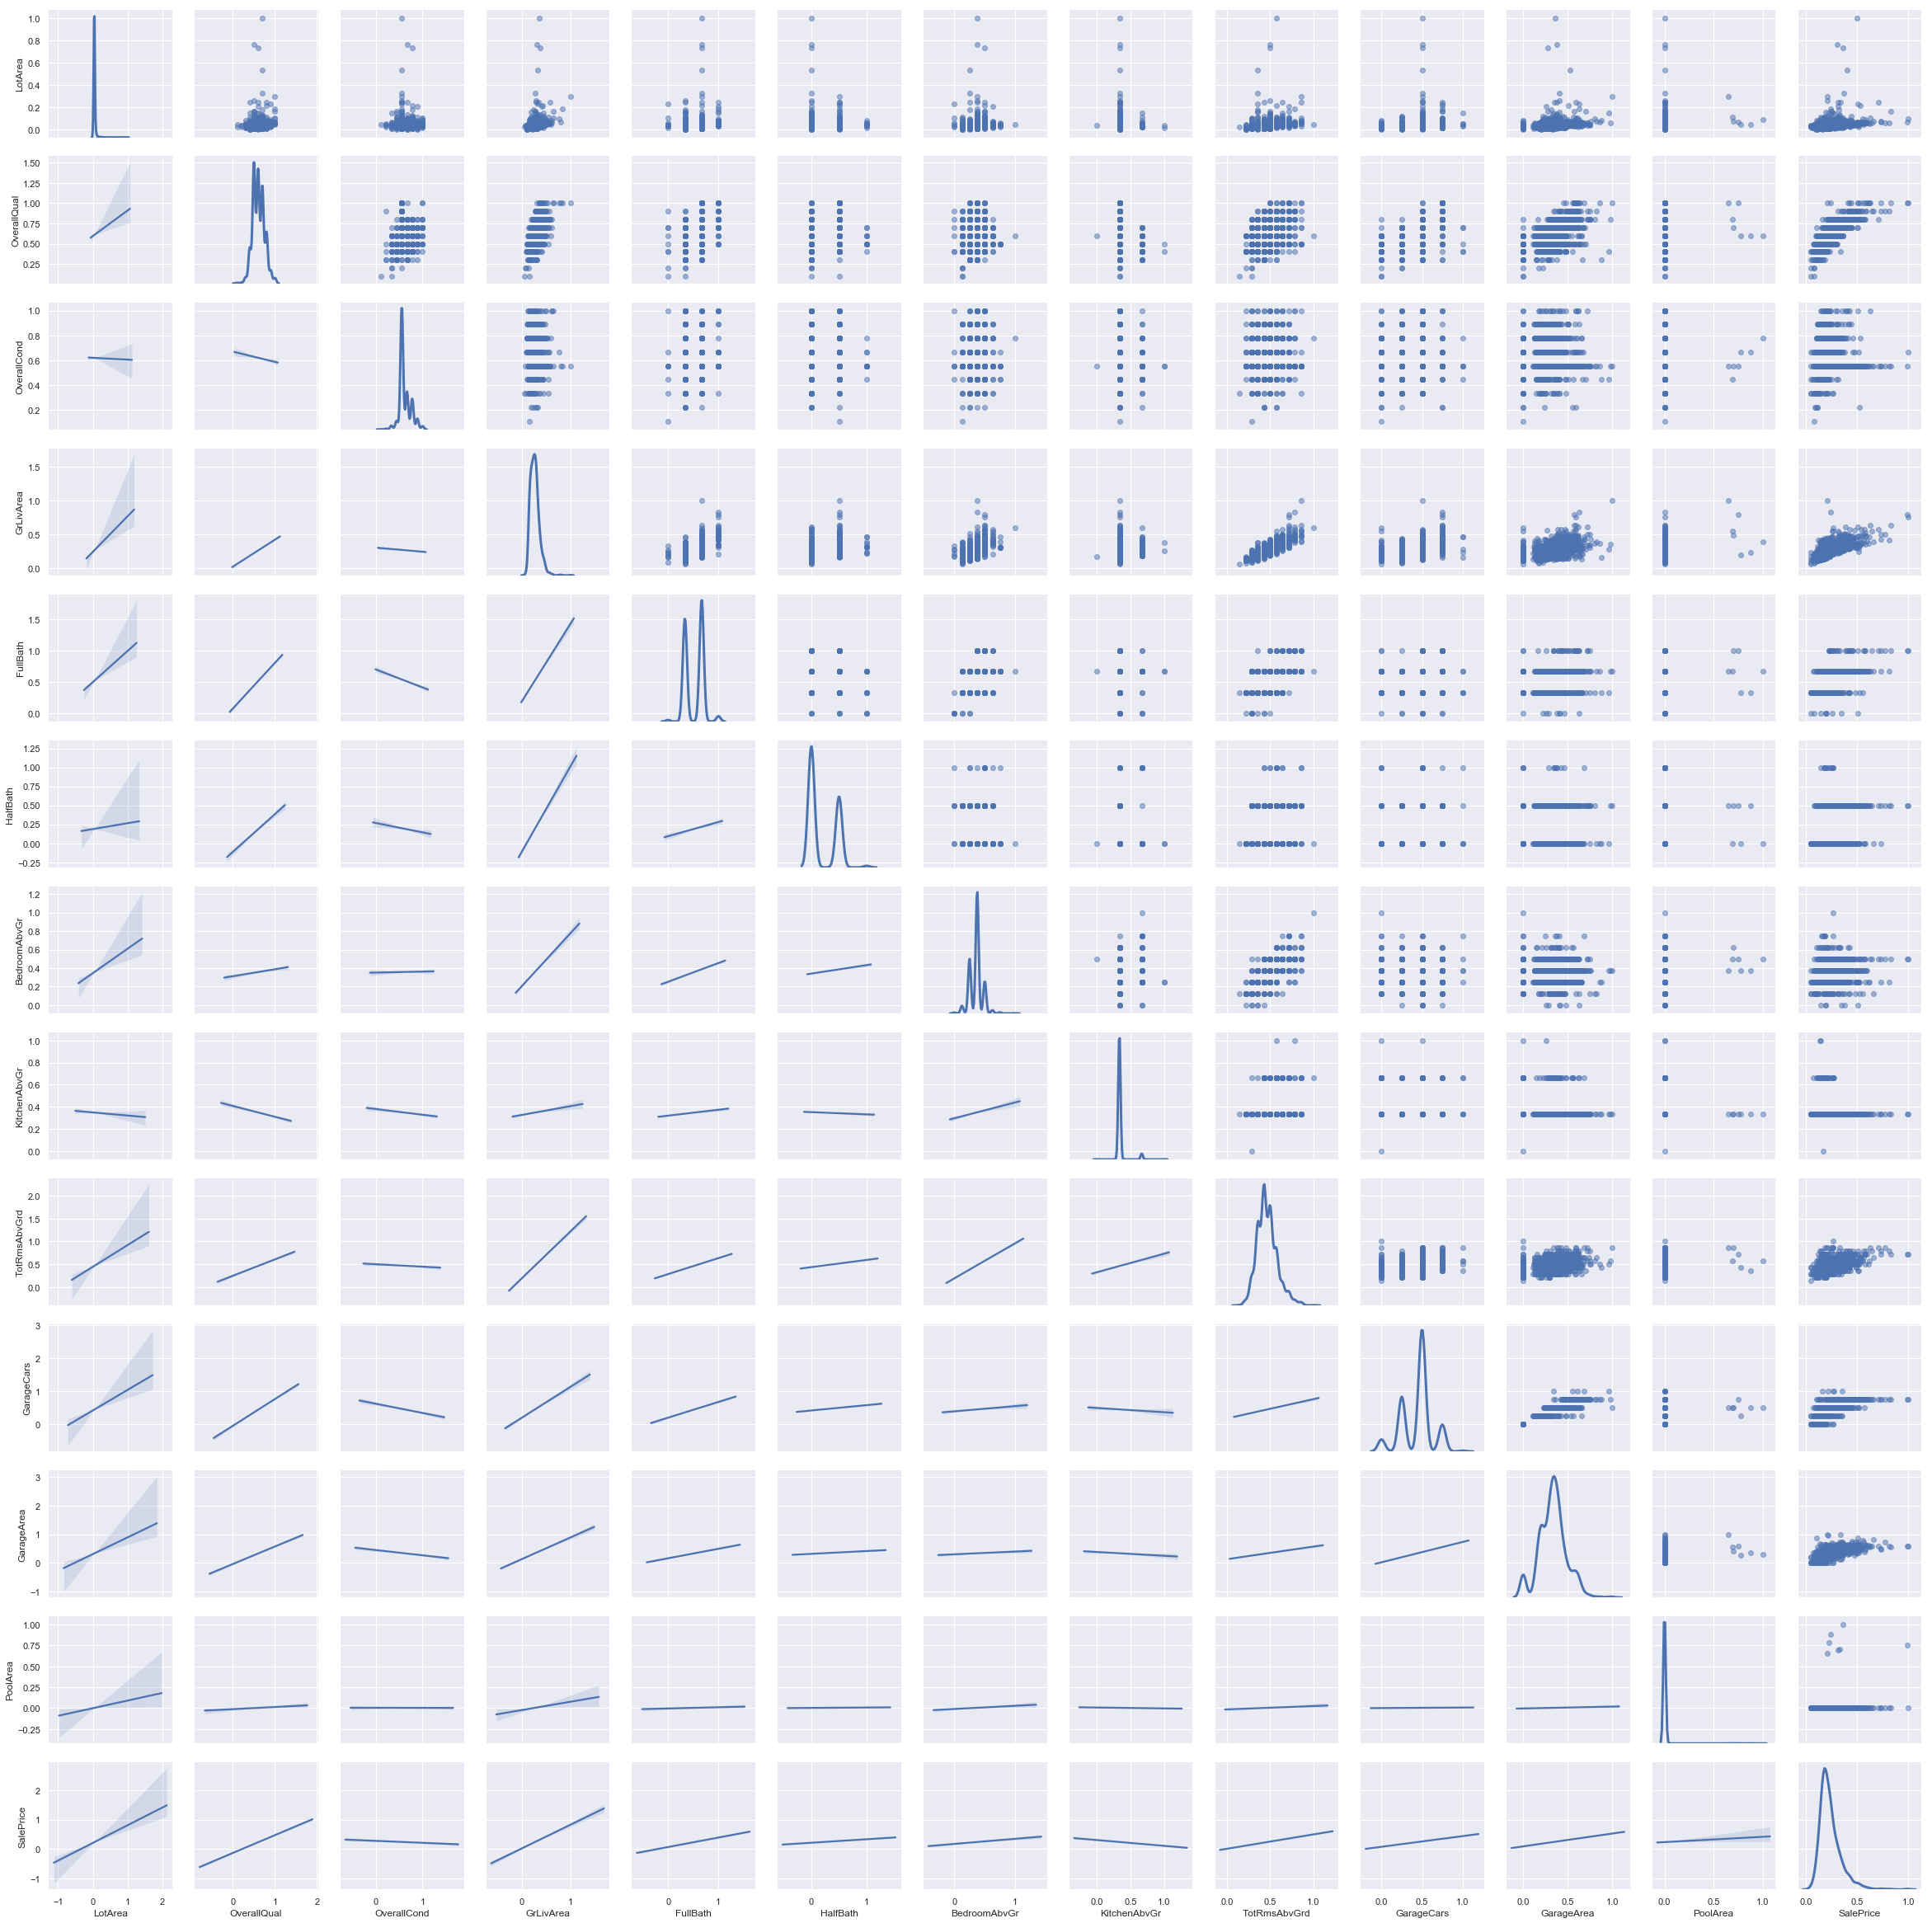

In [141]:
#Generate scatter plot for the continous datafram
g = sns.PairGrid(df_raw_trimmed_cont_scaled, diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [142]:
#generate the correlation matrix 
corrmat = df_raw_trimmed_cont_scaled.corr()
corrmat

,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,PoolArea,SalePrice
LotArea,1.000000,0.105806,-0.005636,0.263116,0.126031,0.014259,0.119690,-0.017784,0.190015,0.154871,0.180403,0.077672,0.263843
OverallQual,0.105806,1.000000,-0.091932,0.593007,0.550600,0.273458,0.101676,-0.183882,0.427452,0.600671,0.562022,0.065166,0.790982
OverallCond,-0.005636,-0.091932,1.000000,-0.079686,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.185758,-0.151521,-0.001985,-0.077856
GrLivArea,0.263116,0.593007,-0.079686,1.000000,0.630012,0.415772,0.521270,0.100063,0.825489,0.467247,0.468997,0.170205,0.708624
FullBath,0.126031,0.550600,-0.194149,0.630012,1.000000,0.136381,0.363252,0.133115,0.554784,0.469672,0.405656,0.049604,0.560664
HalfBath,0.014259,0.273458,-0.060769,0.415772,0.136381,1.000000,0.226651,-0.068263,0.343415,0.219178,0.163549,0.022381,0.284108
BedroomAbvGr,0.119690,0.101676,0.012980,0.521270,0.363252,0.226651,1.000000,0.198597,0.676620,0.086106,0.065253,0.070703,0.168213
KitchenAbvGr,-0.017784,-0.183882,-0.087001,0.100063,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.050634,-0.064433,-0.014525,-0.135907
TotRmsAbvGrd,0.190015,0.427452,-0.057583,0.825489,0.554784,0.343415,0.676620,0.256045,1.000000,0.362289,0.337822,0.083757,0.533723
GarageCars,0.154871,0.600671,-0.185758,0.467247,0.469672,0.219178,0.086106,-0.050634,0.362289,1.000000,0.882475,0.020934,0.640409


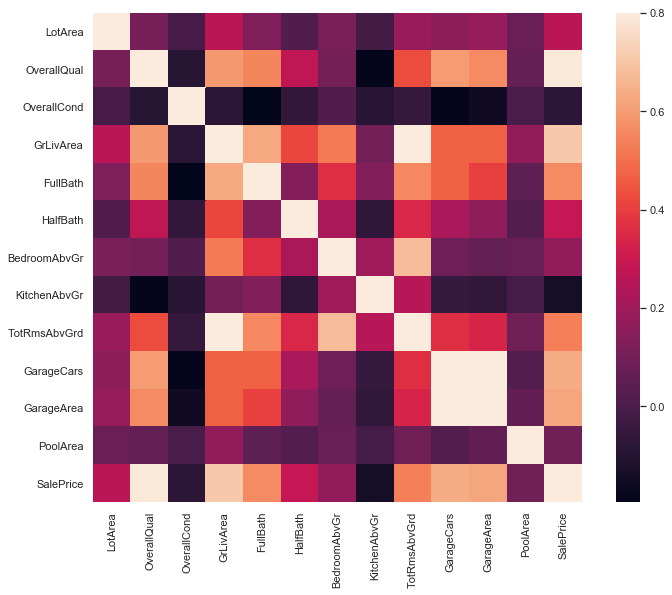

In [143]:
#plot the heat map to visualize correllation
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [144]:
#there's correlation between 'GarageCars' and 'GarageArea'. Both will be conbine to create a single feature
features = pd.DataFrame()
features['GarageCars_GarageArea'] = (df_raw_trimmed_cont_scaled[['GarageCars','GarageArea']].mean(axis=1))

In [145]:
#add a categorical variable and create a boxplot
df_raw_trimmed_cont_scaled['CentralAir'] = df_raw_trimmed['CentralAir']  
df_raw_trimmed_cont_scaled_cat = df_raw_trimmed_cont_scaled

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


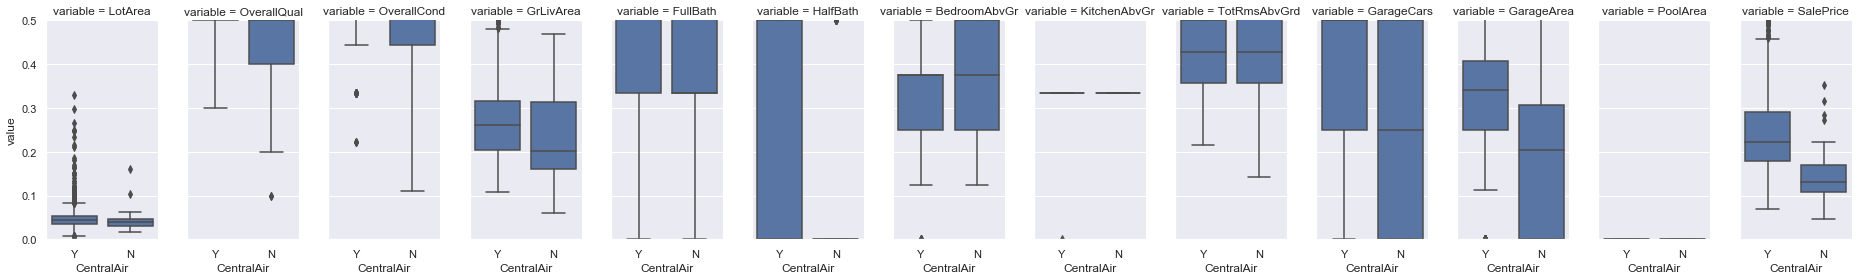

In [146]:
df_long = df_raw_trimmed_cont_scaled_cat
df_long = pd.melt(df_long, id_vars=['CentralAir'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "CentralAir", "value")
plt.ylim([0,.5]) #Set y limit to see more zoomed in picture
plt.show()

In [147]:
#calculate t-test to see if group differences for CentralAir are significant

# Test whether group differences are significant.
for col in df_raw_trimmed_cont_scaled_cat.loc[:,'LotArea':'SalePrice'].columns:
    print()
    print(col)
    print(stats.ttest_ind(
        df_raw_trimmed_cont_scaled_cat[df_raw_trimmed_cont_scaled_cat['CentralAir'] == 'Y'][col].dropna(),
        df_raw_trimmed_cont_scaled_cat[df_raw_trimmed_cont_scaled_cat['CentralAir'] == 'N'][col].dropna()))


LotArea
Ttest_indResult(statistic=1.9021868704657197, pvalue=0.057343621948395485)

OverallQual
Ttest_indResult(statistic=10.794553149978595, pvalue=3.462928631900291e-26)

OverallCond
Ttest_indResult(statistic=4.575194126740298, pvalue=5.161392287936479e-06)

GrLivArea
Ttest_indResult(statistic=3.5922979940282125, pvalue=0.00033866642632510884)

FullBath
Ttest_indResult(statistic=4.1996653264920365, pvalue=2.8350103010630876e-05)

HalfBath
Ttest_indResult(statistic=5.188202418024342, pvalue=2.4223365569156126e-07)

BedroomAbvGr
Ttest_indResult(statistic=0.30058117663024064, pvalue=0.7637767408721341)

KitchenAbvGr
Ttest_indResult(statistic=-9.724451578634685, pvalue=1.0644391159334173e-21)

TotRmsAbvGrd
Ttest_indResult(statistic=1.31848237920308, pvalue=0.1875492949614373)

GarageCars
Ttest_indResult(statistic=9.178762178182739, pvalue=1.4479188015422626e-19)

GarageArea
Ttest_indResult(statistic=9.054896750062227, pvalue=4.2674912393797266e-19)

PoolArea
Ttest_indResult(statistic=0.

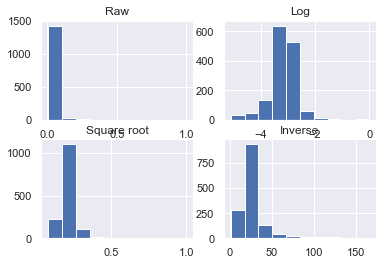

In [148]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# LotArea
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['LotArea'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['LotArea'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['LotArea'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['LotArea'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()


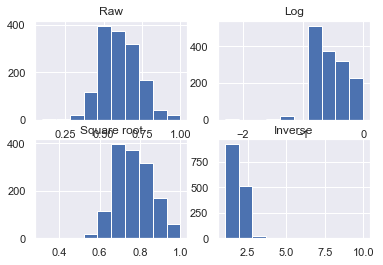

In [149]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# OverallQual
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['OverallQual'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['OverallQual'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['OverallQual'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['OverallQual'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

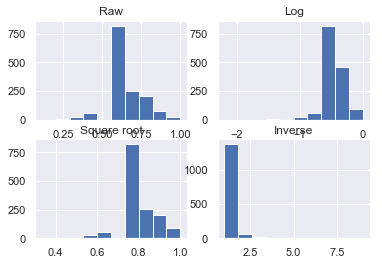

In [150]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# OverallCond
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['OverallCond'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['OverallCond'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['OverallCond'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['OverallCond'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

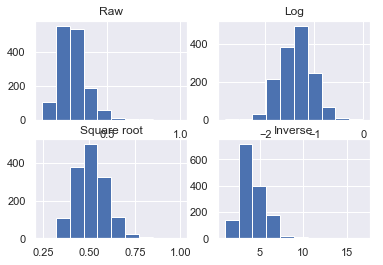

In [151]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# GrLivArea
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['GrLivArea'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['GrLivArea'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['GrLivArea'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['GrLivArea'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

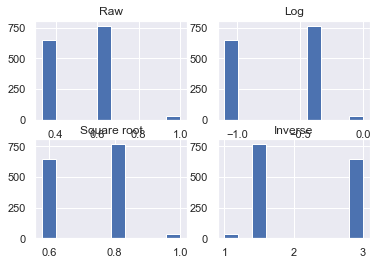

In [152]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# FullBath
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['FullBath'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['FullBath'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['FullBath'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['FullBath'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

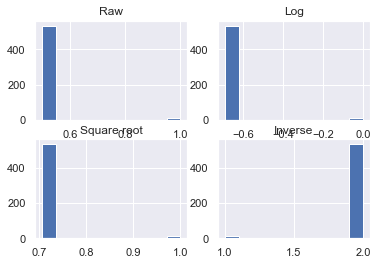

In [153]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# HalfBath
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['HalfBath'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['HalfBath'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['HalfBath'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['HalfBath'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

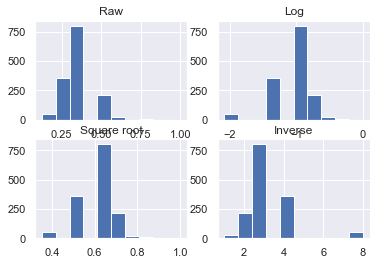

In [154]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# BedroomAbvGr
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['BedroomAbvGr'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['BedroomAbvGr'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['BedroomAbvGr'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['BedroomAbvGr'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

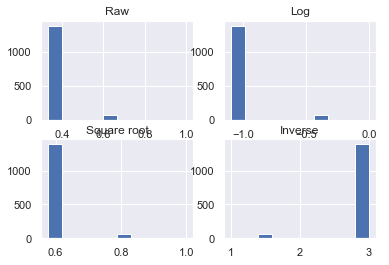

In [155]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# KitchenAbvGr
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['KitchenAbvGr'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['KitchenAbvGr'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['KitchenAbvGr'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['KitchenAbvGr'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

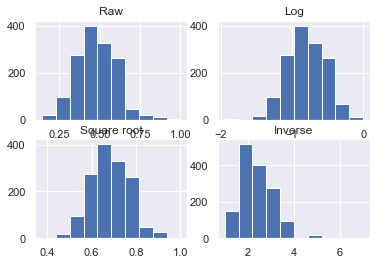

In [156]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# TotRmsAbvGrd
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['TotRmsAbvGrd'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['TotRmsAbvGrd'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['TotRmsAbvGrd'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['TotRmsAbvGrd'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

In [157]:
#no point considering GarageCars and GarageArea for transformation since both have earlier been colapsed in to a single feature.

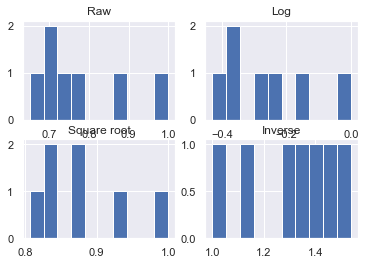

In [158]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# PoolArea
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['PoolArea'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['PoolArea'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['PoolArea'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['PoolArea'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

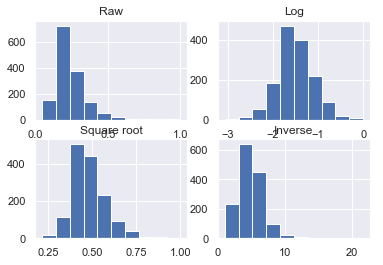

In [159]:
#make a four panel plot of each variable with the raw, log, sqrt and inverse to select the best as per normality

# SalePrice
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df_raw_trimmed_cont_scaled_cat['SalePrice'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_raw_trimmed_cont_scaled_cat['SalePrice'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_raw_trimmed_cont_scaled_cat['SalePrice'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_raw_trimmed_cont_scaled_cat['SalePrice'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

In [160]:
#add all unmodified variables to features

features[['OverallQual', 
          'OverallCond', 
          'FullBath', 
          'HalfBath', 
          'BedroomAbvGr',
          'KitchenAbvGr', 
          'TotRmsAbvGrd', 
          'PoolArea']] = df_raw_trimmed_cont_scaled[['OverallQual',
                                                      'OverallCond', 
                                                      'FullBath', 
                                                      'HalfBath', 
                                                      'BedroomAbvGr',
                                                      'KitchenAbvGr', 
                                                      'TotRmsAbvGrd',
                                                      'PoolArea']]

In [166]:
#as per the panel plots above, LotArea, GrLivArea and SalePrice seem more normal in the log forms and would be rep as such

features['LotArea'] = np.log(df_raw_trimmed_cont_scaled.LotArea)
features['GrLivArea'] = np.log(df_raw_trimmed_cont_scaled.GrLivArea)
features['SalePrice'] = np.log(df_raw_trimmed_cont_scaled.SalePrice)

In [167]:
features.head()

,GarageCars_GarageArea,OverallQual,OverallCond,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,PoolArea,LotArea,GrLivArea,SalePrice
0,0.443230,0.7,0.555556,0.666667,0.5,0.375,0.333333,0.571429,0.0,-3.237610,-1.193745,-1.286779
1,0.412200,0.6,0.888889,0.666667,0.0,0.375,0.333333,0.428571,0.0,-3.110014,-1.497541,-1.425462
2,0.464386,0.7,0.555556,0.666667,0.5,0.375,0.333333,0.428571,0.0,-2.951409,-1.150260,-1.217306
3,0.601375,0.7,0.555556,0.333333,0.0,0.375,0.333333,0.500000,0.0,-3.115236,-1.189660,-1.685075
4,0.669781,0.8,0.555556,0.666667,0.5,0.500,0.333333,0.642857,0.0,-2.714318,-0.942691,-1.105257


### PCA Analysis: simpler method

In [178]:
#Scale the values and normalize data - puts all the numbers between 0 and 1 so you can fairly compare
# (so PCA doesn't lean toward variables that have large outliers). This was done manually earlier but the log 
#transformation in features changed the scale. Below is a simpler method for scaling.But this produces a numpy array object 
#rather than a df. 

X = StandardScaler().fit_transform(features)

# Instantiate the PCA model, n_component is set to the the number of variables in features as in the case, the same munber of 
#PCA components would be generated.
pca = PCA(n_components=12)

# Fit the model to the data
pca.fit(X);

In [180]:
#The amount of variance that each Pricipal Component explains or contains
amount_variance_each = pca.explained_variance_ratio_

# how much each variable explains - #1: .57, #2: .22...
print('Individual Component Covariance Matrix: How much of the result each variable explains\n', amount_variance_each)

Individual Component Covariance Matrix: How much of the result each variable explains
 [0.3806957  0.13415388 0.0945364  0.08517825 0.08008166 0.06853849
 0.05482222 0.03323958 0.02783469 0.01967035 0.01189336 0.00935542]


Individual Component Covariance Matrix: How much of the result each variable explains
 [0.3806957  0.13415388 0.0945364  0.08517825 0.08008166 0.06853849
 0.05482222 0.03323958 0.02783469 0.01967035 0.01189336 0.00935542]



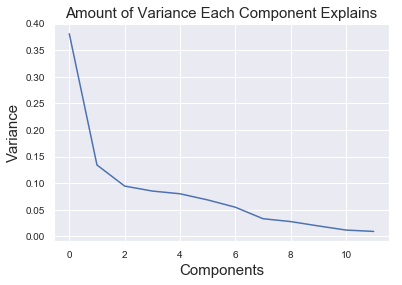

In [187]:
#The amount of variance that each Pricipal Component explains
amount_variance_each = pca.explained_variance_ratio_

# how much each variable explains - #1: .38, #2: .13...
print('Individual Component Covariance Matrix: How much of the result each variable explains\n', amount_variance_each)
print()

# Add title and labels
plt.title('Amount of Variance Each Component Explains', fontsize='15')
plt.xlabel('Components', fontsize='15')
plt.ylabel('Variance', fontsize='15')

# Change fontsize of ticks label
# https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)


plt.plot(amount_variance_each);

Cumulative Covariance Matrix: How much the result cumulative variance explains 
 [ 38.07  51.49  60.94  69.46  77.47  84.32  89.8   93.12  95.9   97.87
  99.06 100.  ]


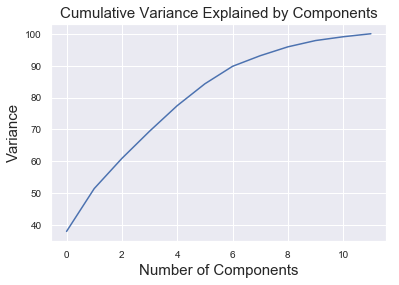

In [190]:
# Cumulative variance:
#round off to four decimal places and take percentage
amount_variance_cumulative =np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print('Cumulative Covariance Matrix: How much the result cumulative variance explains \n', amount_variance_cumulative)

# Do a scatterplot at end to see which variables are ones that explain result

# Add title and labels
plt.title('Cumulative Variance Explained by Components', fontsize='15')
plt.xlabel('Number of Components', fontsize='15')
plt.ylabel('Variance', fontsize='15')

# Change  fontsize of ticks label 
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)


plt.plot(amount_variance_cumulative);

### PCA (Covariance Matrix 2: Thinkful version)

Covariance Matrix:
 [[ 1.0006854   0.60154349 -0.17576584  0.45479181  0.20037413  0.07917978
  -0.05856212  0.36228278  0.04005625  0.30350394  0.5023562   0.68808652]
 [ 0.60154349  1.0006854  -0.09199535  0.55097709  0.27364553  0.10174605
  -0.18400827  0.42774532  0.06521051  0.17833756  0.6146305   0.81774452]
 [-0.17576584 -0.09199535  1.0006854  -0.19428256 -0.06081098  0.01298896
  -0.08706049 -0.05762263 -0.0019863  -0.00630966 -0.10203522 -0.03689326]
 [ 0.45479181  0.55097709 -0.19428256  1.0006854   0.13647406  0.36350096
   0.13320645  0.5551645   0.04963782  0.17931017  0.6536077   0.5951782 ]
 [ 0.20037413  0.27364553 -0.06081098  0.13647406  1.0006854   0.22680683
  -0.06830934  0.34365023  0.02239684  0.03874337  0.43074319  0.31419745]
 [ 0.07917978  0.10174605  0.01298896  0.36350096  0.22680683  1.0006854
   0.19873288  0.67708369  0.07075104  0.2793677   0.53921692  0.20918696]
 [-0.05856212 -0.18400827 -0.08706049  0.13320645 -0.06830934  0.19873288
   1.0006854 

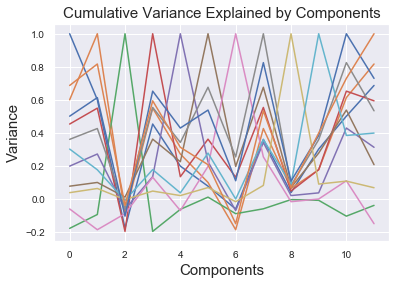

In [191]:
# Doing the PCA- Thinkful version

# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca = features

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

# Add title and labels
plt.title('Cumulative Variance Explained by Components', fontsize='15')
plt.xlabel('Components', fontsize='15')
plt.ylabel('Variance', fontsize='15')

# Change  fontsize of ticks label 
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.plot(Cx);

In [194]:
#Eigenvalues and Eigenvectors of our covariance
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 12).T
    print()
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print()
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print()
    print(40 * '-')

print()
print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)


Eigenvector 1: 
[[-0.32001562]
 [-0.35475325]
 [ 0.07010086]
 [-0.34982591]
 [-0.20160241]
 [-0.24563695]
 [-0.0250814 ]
 [-0.38127831]
 [-0.05661572]
 [-0.21563513]
 [-0.43011844]
 [-0.40343382]]

Eigenvalue 1: 4.571479543974727

----------------------------------------

Eigenvector 2: 
[[ 3.15079689e-01]
 [ 3.64609923e-01]
 [-3.49837504e-02]
 [-2.92829022e-02]
 [ 3.65082545e-04]
 [-5.11271710e-01]
 [-5.38879894e-01]
 [-3.36181023e-01]
 [-3.54700281e-02]
 [-7.42305389e-02]
 [-1.19103781e-01]
 [ 2.82738255e-01]]

Eigenvalue 2: 1.610949986340526

----------------------------------------

Eigenvector 3: 
[[-0.10032173]
 [-0.23151502]
 [-0.05588876]
 [ 0.04139825]
 [ 0.04961177]
 [-0.03230173]
 [-0.00084471]
 [ 0.42313107]
 [ 0.02380477]
 [-0.06244762]
 [-0.65532043]
 [ 0.56128638]]

Eigenvalue 3: 0.11234197958345919

----------------------------------------

Eigenvector 4: 
[[ 0.09904015]
 [ 0.43835113]
 [ 0.05802489]
 [ 0.14668154]
 [ 0.09481026]
 [-0.12078656]
 [-0.05891567]
 [ 0.4269

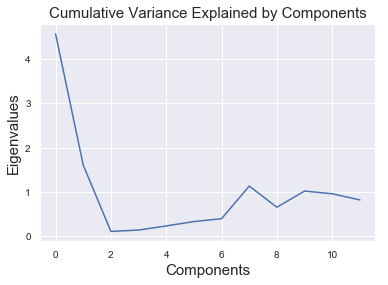

In [195]:
#Determine number of components to use (and which components): Scree Plot
#Rule used to determine number of components: Keep all the components whose eigenvalue falls above 
#the point where the slope of the line changes the most drastically, also called the "elbow"

# Add title and labels
plt.title('Cumulative Variance Explained by Components', fontsize='15')
plt.xlabel('Components', fontsize='15')
plt.ylabel('Eigenvalues', fontsize='15')

# Change  fontsize of ticks label 
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.plot(eig_val_cov)
plt.show()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

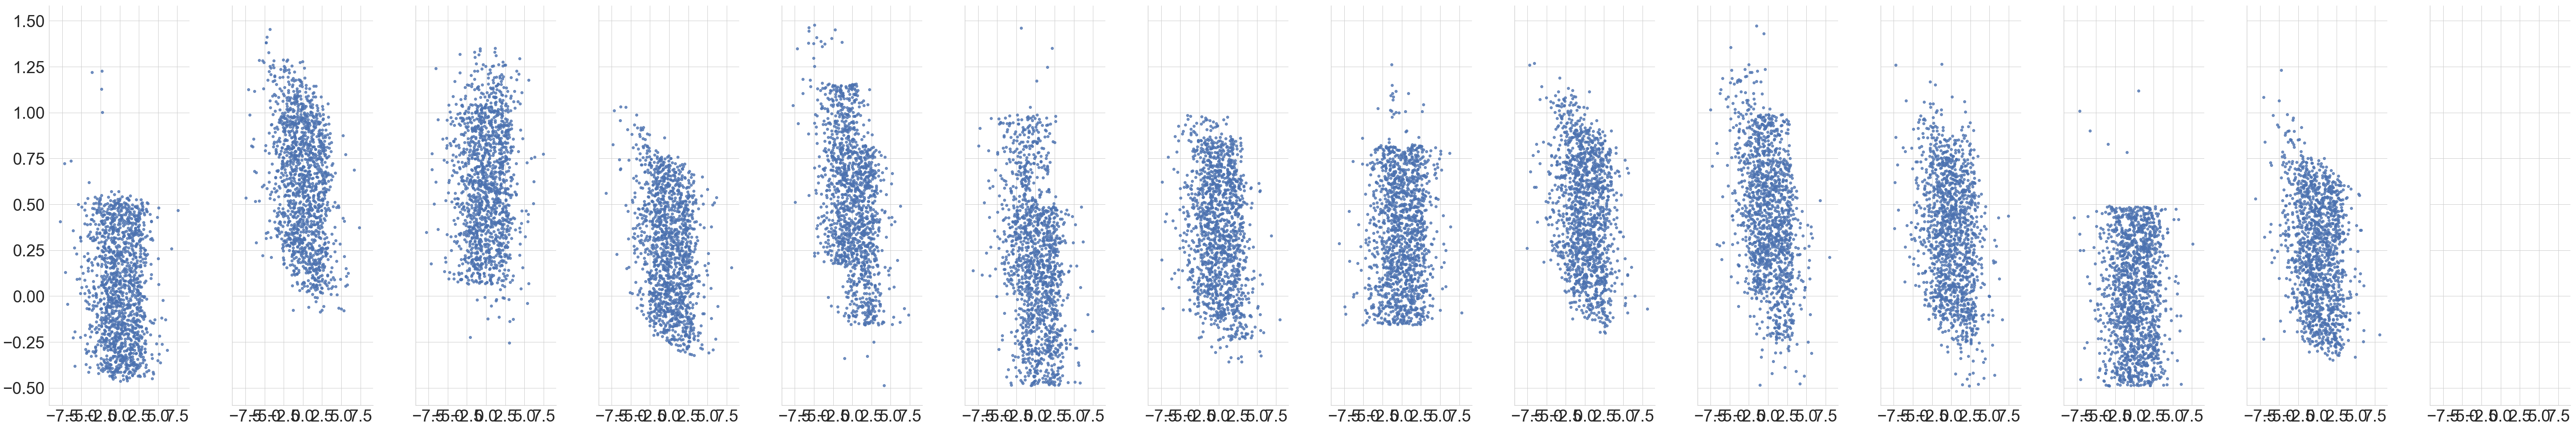

In [198]:
#Check how well new component correlates with old variables

# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_raw_trimmed_cont_scaled
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

with plt.rc_context(dict(sns.axes_style("whitegrid"),
                         **sns.plotting_context("notebook", font_scale=3.5))):
    g = sns.FacetGrid(data_to_plot, col="variable", height=15, aspect=.4)
    g = (g.map(sns.regplot, "Component", "value", x_jitter=.49, y_jitter=.49, fit_reg=False)
         .set_titles("feature: {col_name}") 
         .set_axis_labels("Component", "House Sale Features")
        )
    
plt.show()